<a href="https://colab.research.google.com/github/blessantjosh/Health-Fitness-Tracker/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install matplotlib numpy pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [4]:
file_path = '/content/Sales.xls - Sales.xls.csv'
df = pd.read_csv(file_path)
display(df.head())

,12,15
0,20.5,16
1,21.0,18
2,15.5,27
3,15.3,21
4,23.5,49


In [5]:
df = df.rename(columns={'12': 'test', '15': 'train'})
display(df.head())

,test,train
0,20.5,16
1,21.0,18
2,15.5,27
3,15.3,21
4,23.5,49


# Task
Perform linear regression on the "test" and "train" columns of the dataframe, splitting the data into training and testing sets, training the model, evaluating its performance, making predictions, and visualizing the results.

## Prepare the data

### Subtask:
Separate the 'test' and 'train' columns into features (X) and target (y) variables.


**Reasoning**:
Create X and y DataFrames for the features and target variables for linear regression.



In [6]:
X = df[['test']]
y = df['train']
display(X.head())
display(y.head())

,test
0,20.5
1,21.0
2,15.5
3,15.3
4,23.5


,train
0,16
1,18
2,27
3,21
4,49


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Import the train_test_split function and split the data into training and testing sets.



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,test
12,25.3
8,28.0
16,29.6
9,24.0
33,23.4


,test
26,30.6
13,25.0
24,20.7
21,19.7
15,36.5


,train
12,29
8,36
16,44
9,40
33,17


,train
26,40
13,62
24,14
21,24
15,46


## Create and train the model

### Subtask:
Build a linear regression model and train it using the training data.


**Reasoning**:
Import the LinearRegression class, create an instance of the model, and train it using the training data.



In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using the testing data.


**Reasoning**:
Evaluate the performance of the trained model using MSE and R2 score.



In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 224.09629706236424
R-squared: 0.15792035613068645


## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Use the trained model to make predictions on the test set features and store the results in `y_pred`.



In [11]:
y_pred = model.predict(X_test)

## Visualize the results

### Subtask:
Visualize the results of the linear regression, such as the regression line and the predicted values versus the actual values.


**Reasoning**:
Visualize the actual vs. predicted values and the linear regression line on the training data using matplotlib.



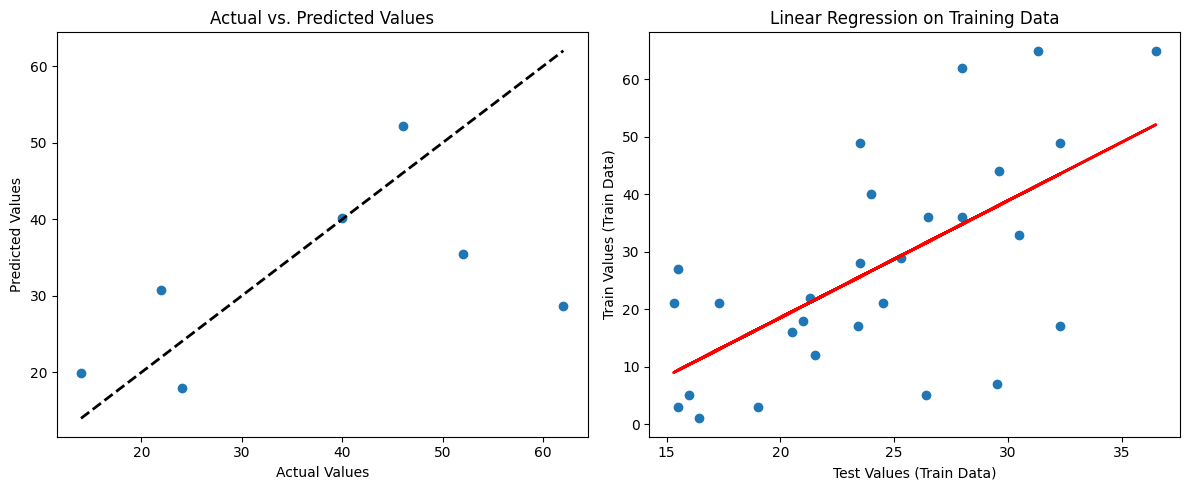

In [12]:
plt.figure(figsize=(12, 5))

# Plot Actual vs. Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Plot Linear Regression on Training Data
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2)
plt.xlabel("Test Values (Train Data)")
plt.ylabel("Train Values (Train Data)")
plt.title("Linear Regression on Training Data")

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training (80%) and testing (20%) sets using `train_test_split` with `random_state=42`.
*   A `LinearRegression` model was trained using the training data (`X_train`, `y_train`).
*   The model's performance on the test set (`X_test`, `y_test`) resulted in a Mean Squared Error (MSE) of approximately 224.10 and an R-squared score of approximately 0.158.
*   Predictions (`y_pred`) were made on the test data using the trained model.
*   Visualizations were created showing the relationship between actual and predicted values in the test set and the fitted regression line on the training data. The scatter plot of actual vs. predicted values showed significant dispersion around the ideal diagonal line, aligning with the low R-squared score.

### Insights or Next Steps

*   The low R-squared value (\~0.158) suggests that the linear model explains only a small portion of the variance in the target variable. This indicates that the 'test' column is not a strong linear predictor of the 'train' column.
*   Consider exploring other features in the dataset, feature engineering, or trying different regression models (e.g., polynomial regression, or non-linear models) to potentially improve the predictive performance.
